# <center>Bias-Variance Tradeoff</center>

Bias-Variance tradeoff refers to the idea of balancing the increase in training error (bias refers to training error) to keep the testing error low (variance refers to testing error).

Building on the previous article [Polynomial Regression](./Polynomial_Regression.ipynb) we can show that lower degree polynomials have a high bias and low variance and as the degree of the polynomial increases the bias decreases while the variance increases.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

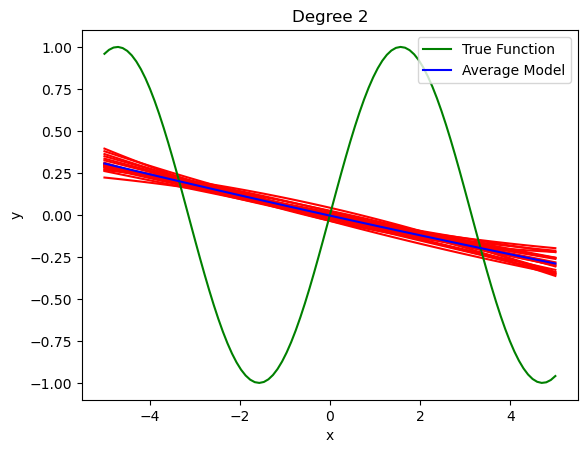

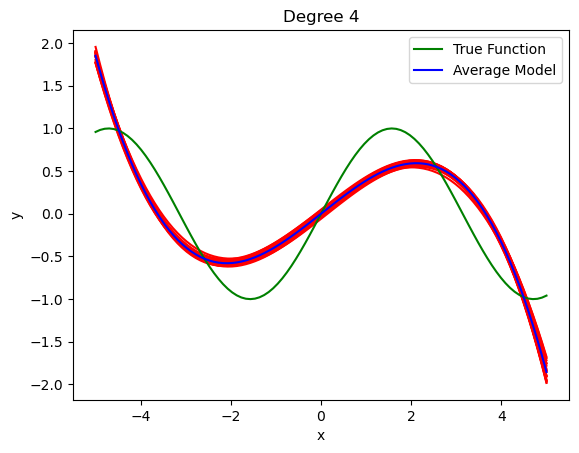

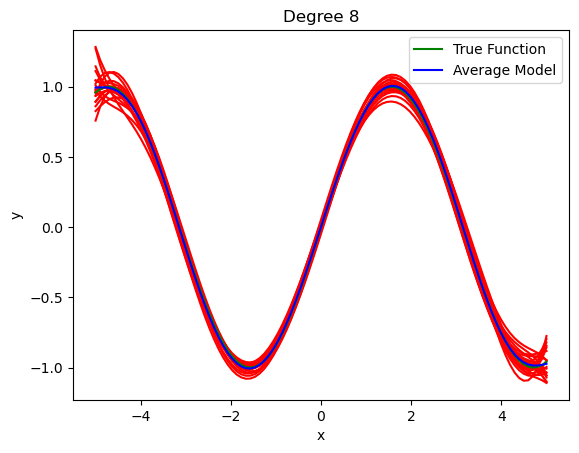

In [19]:
# Code inspired by Reference number 2

np.random.seed(20)

def polynomial_features(x, m):
    matrix = np.column_stack([x**i for i in range(1, m + 1)])
    return np.hstack((np.ones((matrix.shape[0],1)), matrix))

n = 200 # Data Points
ns = 20# Number of samples
xx = np.linspace(-5, 5, 100)
yy = np.sin(xx)

degrees = [2, 4, 8]

for m in degrees:
    plt.figure()
    plt.axis()
    plt.title(f'Degree {m}')
    plt.xlabel('x')
    plt.ylabel('y')

    avg_model = np.zeros(len(np.arange(-5, 5, 0.1)))

    for sample in range(0, ns):
        x = np.linspace(-5, 5, n)
        y = np.sin(x) + np.random.normal(0, 0.2, n)

        x_train = x.reshape(-1, 1)
        x_train = polynomial_features(x_train, m)
        y_train = y.reshape(-1, 1)

        res = np.linalg.lstsq(x_train, y_train, rcond=None)
        w = res[0]

        x_fit = np.linspace(-5, 5, 100).reshape(-1, 1)
        x_fit_poly = polynomial_features(x_fit, m)
        y_fit = x_fit_poly.dot(w)

        avg_model += y_fit.flatten()

        plt.plot(x_fit, y_fit, 'r-')
    
    plt.plot(xx, yy, 'g-', label='True Function')
    plt.plot(xx, avg_model / ns, 'b-', label='Average Model')
    plt.legend()
    plt.show()




# References

https://htmlpreview.github.io/?https://github.com/echow/ml-matlab/blob/main/live/polyregr_bias_variance.html